In [1]:
import pandas as pd
from mplsoccer import Pitch, VerticalPitch, Sbopen
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter("ignore")

In [2]:
parser = Sbopen()
df = parser.competition()

In [3]:
df  = pd.DataFrame(df)
df.head()

competition_id  season_id country_name        competition_name  \
0               9         27      Germany           1. Bundesliga   
1            1267        107       Africa  African Cup of Nations   
2              16          4       Europe        Champions League   
3              16          1       Europe        Champions League   
4              16          2       Europe        Champions League   

  competition_gender  competition_youth  competition_international  \
0               male              False                      False   
1               male              False                       True   
2               male              False                      False   
3               male              False                      False   
4               male              False                      False   

  season_name               match_updated        match_updated_360  \
0   2015/2016  2023-12-12T07:43:33.436182                     None   
1        2023  2024-02-14T05:41:27.566989                     None   
2   2018/2019  2023-03-07T12:20:48.118250  2021-06-13T16:17:31.694   
3   2017/2018  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   
4   2016/2017  2021-08-27T11:26:39.802832  2021-06-13T16:17:31.694   

  match_available_360             match_available  
0                None  2023-12-12T07:43:33.436182  
1                None  2024-02-14T05:41:27.566989  
2                None  2023-03-07T12:20:48.118250  
3                None  2021-01-23T21:55:30.425330  
4                None            2020-07-29T05:00

In [4]:
df['competition_name'].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa del Rey', "FA Women's Super League", 'FIFA U20 World Cup',
       'FIFA World Cup', 'Indian Super league', 'La Liga',
       'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [5]:
df['season_name'].unique()

array(['2015/2016', '2023', '2018/2019', '2017/2018', '2016/2017',
       '2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011',
       '2009/2010', '2008/2009', '2006/2007', '2004/2005', '2003/2004',
       '1999/2000', '1972/1973', '1971/1972', '1970/1971', '1983/1984',
       '1982/1983', '1977/1978', '2020/2021', '2019/2020', '1979', '2022',
       '2018', '1990', '1986', '1974', '1970', '1962', '1958',
       '2021/2022', '2007/2008', '2005/2006', '1973/1974', '1997/1998',
       '1981', '2022/2023', '1977', '1986/1987', '2020', '1988/1989',
       '2019'], dtype=object)

In [6]:
competitionName = 'La Liga'
seasonName = '2019/2020'

In [7]:
# enter the competition name and season name 
filtered_df = df.loc[df['competition_name'] == competitionName].loc[df['season_name'] == seasonName]
filtered_df = filtered_df.reset_index()
filtered_df.drop('index', axis=1, inplace=True)
filtered_df

competition_id  season_id country_name competition_name competition_gender  \
0              11         42        Spain          La Liga               male   

   competition_youth  competition_international season_name  \
0              False                      False   2019/2020   

                match_updated        match_updated_360 match_available_360  \
0  2023-07-25T00:16:32.999467  2021-06-13T16:17:31.694                None   

              match_available  
0  2023-07-25T00:16:32.999467

In [8]:
competitionId  = filtered_df.loc[0,'competition_id']
seasonID = filtered_df.loc[0,'season_id']

In [9]:
matches = parser.match(competition_id=competitionId, season_id=seasonID)
matches.head()

match_id match_date            kick_off  home_score  away_score  \
0    303731 2020-02-22 2020-02-22 16:00:00           5           0   
1    303532 2020-06-16 2020-06-16 22:00:00           2           0   
2    303516 2020-06-27 2020-06-27 17:00:00           2           2   
3    303596 2019-12-18 2019-12-18 20:00:00           0           0   
4    303430 2019-09-24 2019-09-24 21:00:00           2           1   

  match_status match_status_360               last_updated  \
0    available        scheduled 2020-07-29 05:00:00.000000   
1    available        scheduled 2022-12-01 10:49:24.173853   
2    available        scheduled 2022-12-01 11:01:34.955134   
3    available        scheduled 2020-07-29 05:00:00.000000   
4    available        scheduled 2020-07-29 05:00:00.000000   

         last_updated_360  match_week  ...  competition_stage_id  \
0 2021-06-13 16:17:31.694          25  ...                     1   
1 2021-06-13 16:17:31.694          29  ...                     1   
2 2021-06-13 16:17:31.694          32  ...                     1   
3 2021-06-13 16:17:31.694          10  ...                     1   
4 2021-06-13 16:17:31.694           6  ...                     1   

  competition_stage_name stadium_id      stadium_name stadium_country_id  \
0         Regular Season        342  Spotify Camp Nou                214   
1         Regular Season        342  Spotify Camp Nou                214   
2         Regular Season        653   Abanca-Balaídos                214   
3         Regular Season        342  Spotify Camp Nou                214   
4         Regular Season        342  Spotify Camp Nou                214   

   stadium_country_name referee_id referee_name referee_country_id  \
0                 Spain        NaN          NaN                NaN   
1                 Spain        NaN          NaN                NaN   
2                 Spain        NaN          NaN                NaN   
3                 Spain        NaN          NaN                NaN   
4                 Spain        NaN          NaN                NaN   

   referee_country_name  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 52 columns]

In [10]:
matches['home_team_name'].unique()

array(['Barcelona', 'Celta Vigo', 'Villarreal', 'Levante UD',
       'Real Sociedad', 'Valencia', 'Deportivo Alavés', 'Real Valladolid',
       'Mallorca', 'Espanyol', 'Sevilla', 'Real Madrid', 'Eibar',
       'Real Betis', 'Granada', 'Leganés', 'Atlético Madrid'],
      dtype=object)

In [11]:
matches['away_team_name'].unique()

array(['Eibar', 'Leganés', 'Barcelona', 'Real Madrid', 'Villarreal',
       'Mallorca', 'Levante UD', 'Osasuna', 'Athletic Club',
       'Real Sociedad', 'Espanyol', 'Atlético Madrid', 'Celta Vigo',
       'Real Valladolid', 'Getafe', 'Deportivo Alavés', 'Granada',
       'Sevilla'], dtype=object)

In [12]:
# Home team name and away team name 
away_team = 'Barcelona'
home_team = 'Real Madrid'

In [13]:
filtered_match = matches.loc[matches['home_team_name'] == home_team].loc[matches['away_team_name'] == away_team]
filtered_match.reset_index(inplace=True)
filtered_match.drop('index', axis=1, inplace=True)
filtered_match

match_id match_date            kick_off  home_score  away_score  \
0    303470 2020-03-01 2020-03-01 21:00:00           2           0   

  match_status match_status_360               last_updated  \
0    available        scheduled 2022-12-01 10:40:43.605436   

         last_updated_360  match_week  ...  competition_stage_id  \
0 2021-06-13 16:17:31.694          26  ...                     1   

  competition_stage_name stadium_id               stadium_name  \
0         Regular Season        353  Estadio Santiago Bernabéu   

  stadium_country_id  stadium_country_name referee_id  \
0                214                 Spain      180.0   

                 referee_name referee_country_id  referee_country_name  
0  Antonio Miguel Mateu Lahoz              214.0                 Spain  

[1 rows x 52 columns]

In [14]:
filtered_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         1 non-null      int64         
 1   match_date                       1 non-null      datetime64[ns]
 2   kick_off                         1 non-null      datetime64[ns]
 3   home_score                       1 non-null      int64         
 4   away_score                       1 non-null      int64         
 5   match_status                     1 non-null      object        
 6   match_status_360                 1 non-null      object        
 7   last_updated                     1 non-null      datetime64[ns]
 8   last_updated_360                 1 non-null      datetime64[ns]
 9   match_week                       1 non-null      int64         
 10  competition_id                   1 non-null      int64         
 1

In [15]:
matchId = filtered_match.loc[0, 'match_id']

In [16]:
# main match data 
df, related, freeze, tactics = parser.event(matchId)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4227 non-null   object 
 1   index                           4227 non-null   int64  
 2   period                          4227 non-null   int64  
 3   timestamp                       4227 non-null   object 
 4   minute                          4227 non-null   int64  
 5   second                          4227 non-null   int64  
 6   possession                      4227 non-null   int64  
 7   duration                        3045 non-null   float64
 8   match_id                        4227 non-null   int64  
 9   type_id                         4227 non-null   int64  
 10  type_name                       4227 non-null   object 
 11  possession_team_id              4227 non-null   int64  
 12  possession_team_name            42

In [17]:
#prepare the dataframe of passes that were no-throw ins
def plot_pass_map(df, team1, team2):
    df = df.copy()
    mask_team = (df.type_name == 'Pass') & (df.team_name == team1) & (df.sub_type_name != "Throw-in")
    df_passes = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'player_name', 'outcome_name']]
    df_passes['outcome_name'] = df_passes['outcome_name'].replace(np.nan, 'Successfull')
    
    #get the list of all players who made a pass
    names = df_passes['player_name'].unique()
    
    #draw 4x4 pitches
    pitch = Pitch(line_color='white', pitch_color='grass', stripe=True)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.00, title_space=0.04, endnote_space=0.00)
    
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #put player name over the plot
        ax.text(60, -7, name, ha='center', va='center', fontsize=8)

        #take only passes by this player
        player_df_s = df_passes.loc[df_passes["player_name"] == name].loc[df_passes['outcome_name'] == 'Successfull']
        player_df_u = df_passes.loc[df_passes["player_name"] == name].loc[df_passes['outcome_name'] != 'Successfull']
    
        pitch.scatter(player_df_s.x, player_df_s.y, alpha=0.3, s=50, color="blue", ax=ax)
        # plot arrow
        pitch.arrows(player_df_s.x, player_df_s.y, player_df_s.end_x, player_df_s.end_y, color="blue", ax=ax, width=1)
    
        pitch.scatter(player_df_u.x, player_df_u.y, alpha=0.3, s=50, color="red", ax=ax)
        # plot arrow
        pitch.arrows(player_df_u.x, player_df_u.y, player_df_u.end_x, player_df_u.end_y, color="red", ax=ax, width=1)

        
    
    #We have more than enough pitches - remove them
    for ax in axs['pitch'].flat[len(names):]:
        ax.remove()
    
    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, f'{team1} passes against {team2}', ha='center', va='center', fontsize=30)
    plt.show()

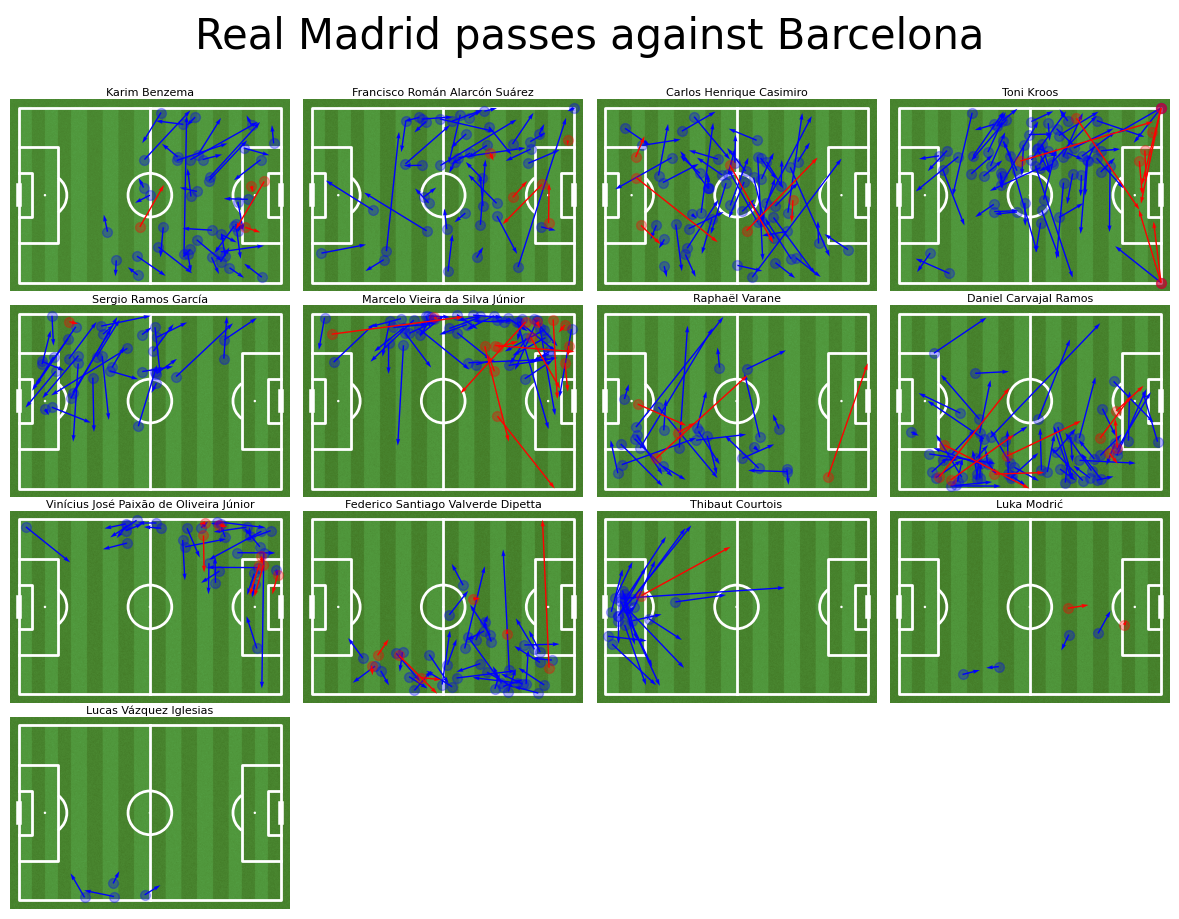

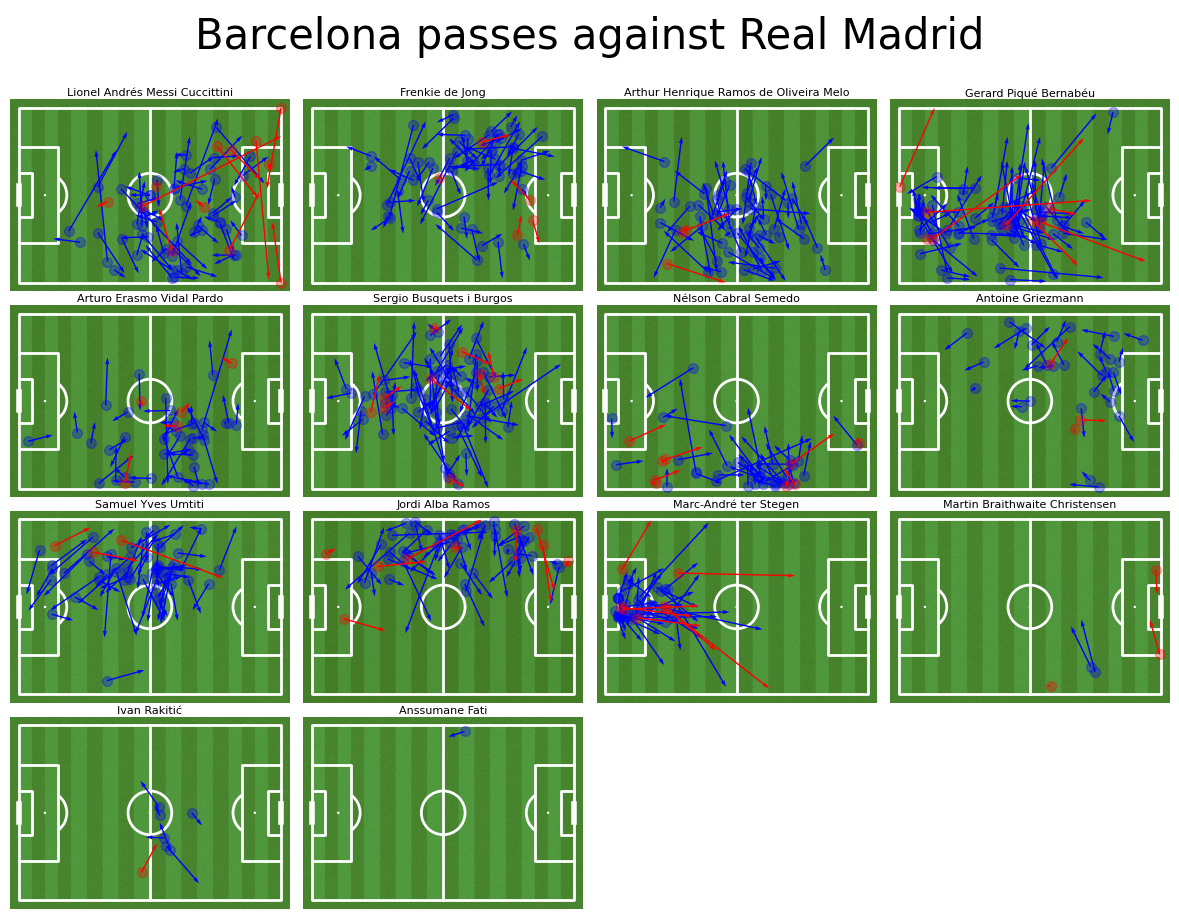

In [18]:
plot_pass_map(df, home_team, away_team)
plot_pass_map(df, away_team, home_team)

Plotting the heat maps

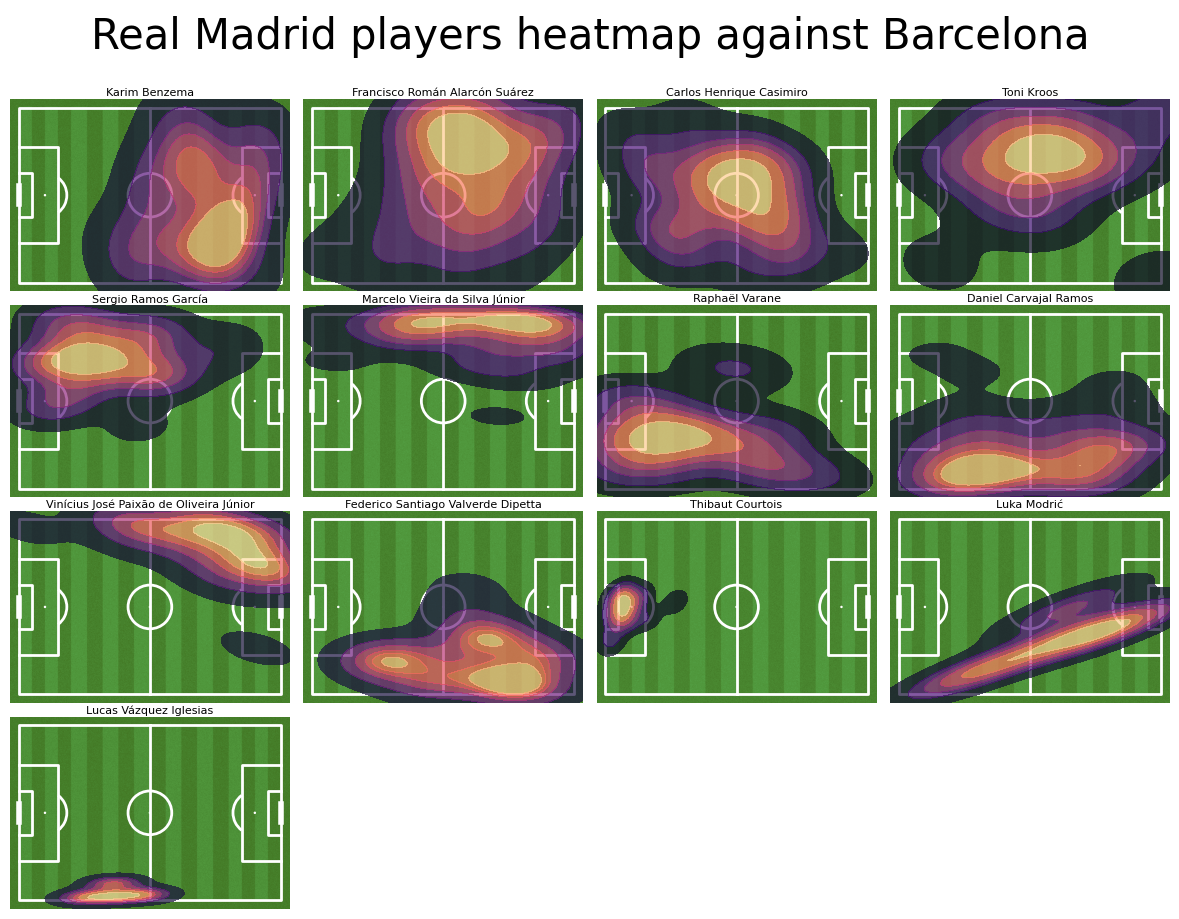

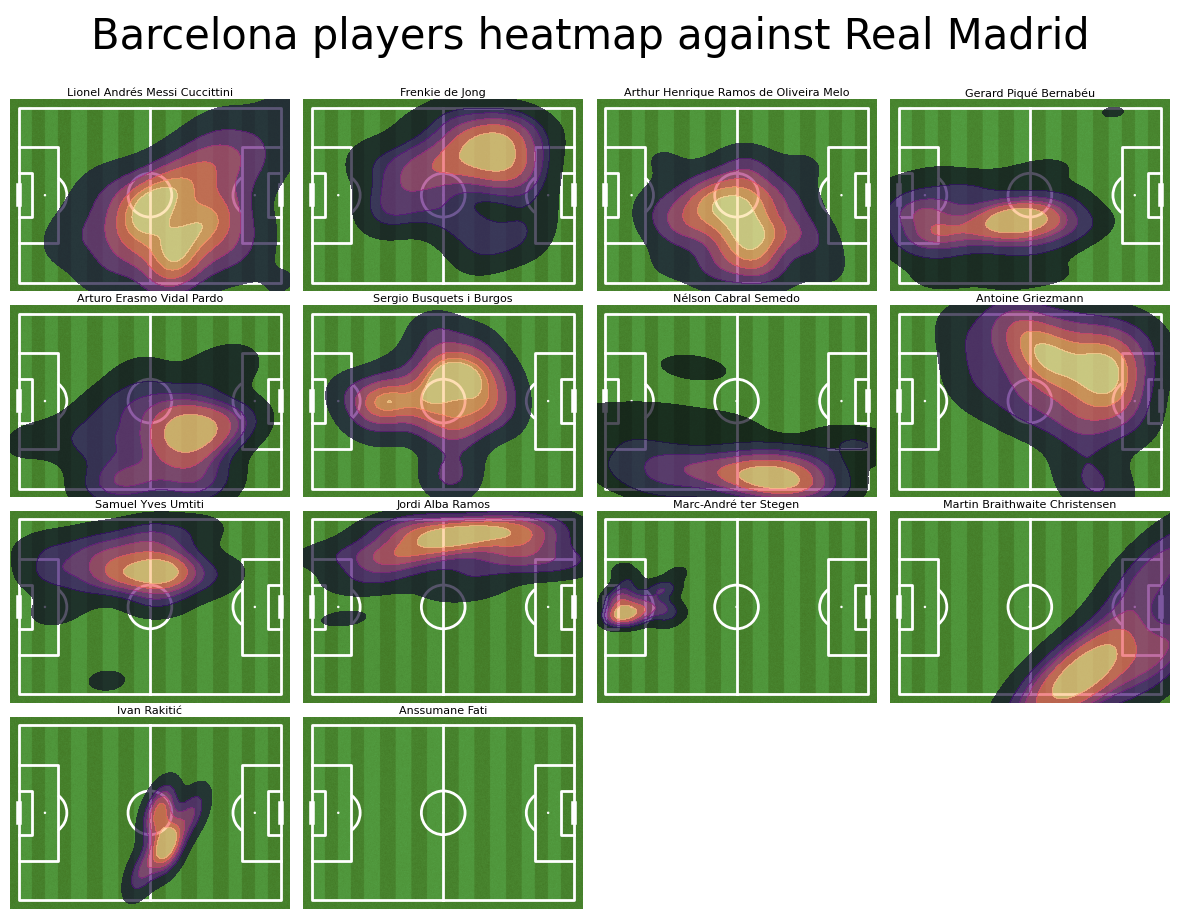

In [19]:
#prepare the dataframe of passes that were no-throw ins
def plot_heatmap(df, team1, team2):
    df = df.copy()
    mask_team = (df.type_name == 'Pass') & (df.team_name == team1) & (df.sub_type_name != "Throw-in")
    df_passes = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'player_name', 'outcome_name']]
    df_passes['outcome_name'] = df_passes['outcome_name'].replace(np.nan, 'Successfull')
    
    #get the list of all players who made a pass
    names = df_passes['player_name'].unique()
    
    #draw 4x4 pitches
    pitch = Pitch(line_color='white', pitch_color='grass', stripe=True)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.00, title_space=0.04, endnote_space=0.00)
    
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #put player name over the plot
        ax.text(60, -7, name, ha='center', va='center', fontsize=8)

        #take only passes by this player
        player_df = df_passes.loc[df_passes["player_name"] == name]
    
        kde = sns.kdeplot(
            data=player_df,
            x='x',
            y='y',
            ax=ax,
            shade=True,
            shade_lowest=False,
            alpha=0.7,
            levels=7,
            cmap='magma'
        )
        
    #We have more than enough pitches - remove them
    for ax in axs['pitch'].flat[len(names):]:
        ax.remove()
    
    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, f'{team1} players heatmap against {team2}', ha='center', va='center', fontsize=30)
    plt.show()

plot_heatmap(df, home_team, away_team)
plot_heatmap(df, away_team, home_team)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4227 non-null   object 
 1   index                           4227 non-null   int64  
 2   period                          4227 non-null   int64  
 3   timestamp                       4227 non-null   object 
 4   minute                          4227 non-null   int64  
 5   second                          4227 non-null   int64  
 6   possession                      4227 non-null   int64  
 7   duration                        3045 non-null   float64
 8   match_id                        4227 non-null   int64  
 9   type_id                         4227 non-null   int64  
 10  type_name                       4227 non-null   object 
 11  possession_team_id              4227 non-null   int64  
 12  possession_team_name            42

In [21]:
filtered_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         1 non-null      int64         
 1   match_date                       1 non-null      datetime64[ns]
 2   kick_off                         1 non-null      datetime64[ns]
 3   home_score                       1 non-null      int64         
 4   away_score                       1 non-null      int64         
 5   match_status                     1 non-null      object        
 6   match_status_360                 1 non-null      object        
 7   last_updated                     1 non-null      datetime64[ns]
 8   last_updated_360                 1 non-null      datetime64[ns]
 9   match_week                       1 non-null      int64         
 10  competition_id                   1 non-null      int64         
 1

Plotting shots and visualising them 

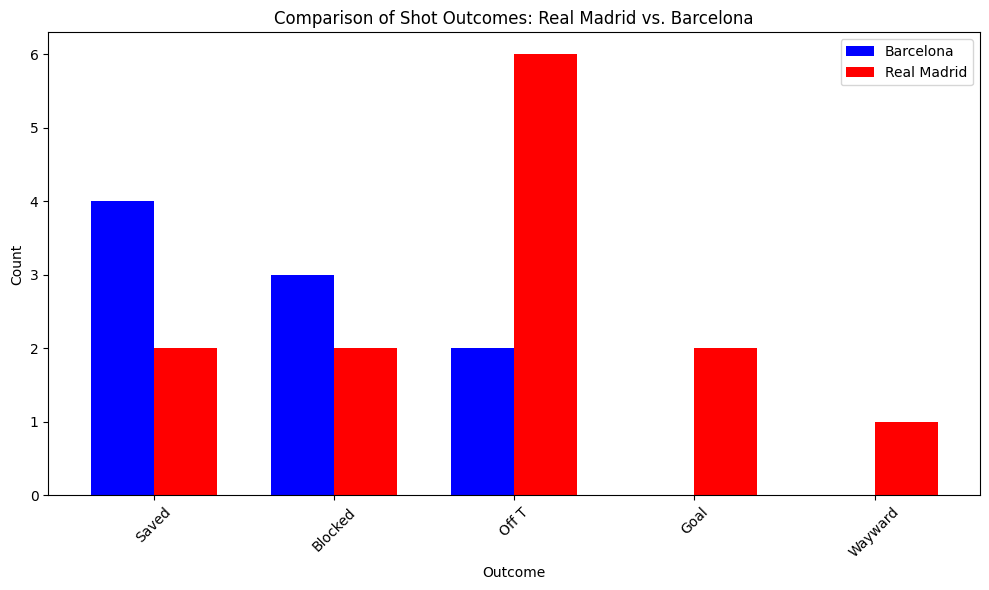

In [22]:
def plot_compare_shots(df):
    df = df.copy()
    shots_df = df[df['type_name'] == 'Shot']
    shots_home_team = shots_df[shots_df['team_name'] == home_team]
    shots_away_team = shots_df[shots_df['team_name'] == away_team]

    # List of all outcome types
    all_outcomes = ['Saved', 'Blocked', 'Off T', 'Goal', 'Wayward']
    
    # Value counts for each outcome for the away team
    away_team_counts = [shots_away_team[shots_away_team['outcome_name'] == outcome]['outcome_name'].value_counts().get(outcome, 0) for outcome in all_outcomes]
    
    # Value counts for each outcome for the home team
    home_team_counts = [shots_home_team[shots_home_team['outcome_name'] == outcome]['outcome_name'].value_counts().get(outcome, 0) for outcome in all_outcomes]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bar_width = 0.35
    index = np.arange(len(all_outcomes))
    
    # Plotting away team's outcomes
    ax.bar(index - bar_width/2, away_team_counts, label=f'{away_team}', color='blue', width=bar_width)
    
    # Plotting home team's outcomes next to the away team's outcomes
    ax.bar(index + bar_width/2, home_team_counts, label=f'{home_team}', color='red', width=bar_width)
    
    # Adding labels and title
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Count')
    ax.set_title(f'Comparison of Shot Outcomes: {home_team} vs. {away_team}')
    ax.set_xticks(index)
    ax.set_xticklabels(all_outcomes)
    ax.legend()
    
    # Show plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_compare_shots(df)


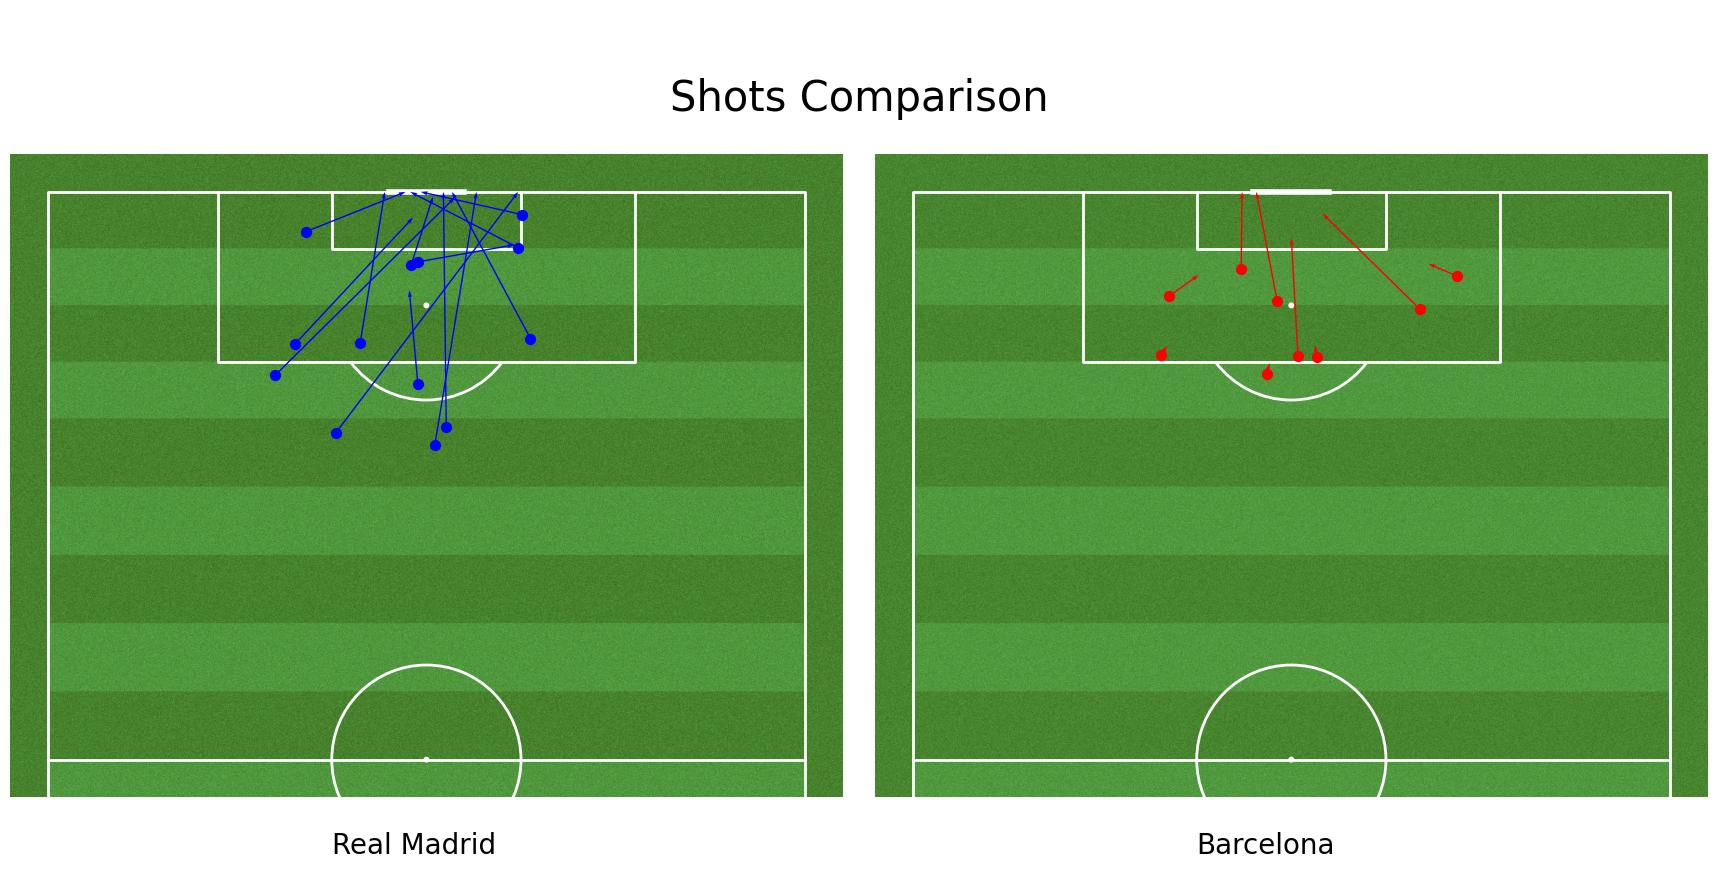

In [23]:
def plot_shots(df, team1, team2):
    teams = [team1, team2]

    pitch = VerticalPitch(half=True, line_color='white', pitch_color='grass', stripe=True)
    fig, axs = pitch.grid(ncols=2, nrows=1, axis=False)
    
    for team, ax in zip(teams, axs['pitch'].flat):
        mask_team = (df.type_name == 'Shot') & (df.team_name == team)
        df_shots = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y', 'player_name', 'outcome_name']]
        ax.text(30,50, team, fontsize=20)
        
        if team == team1:
            pitch.scatter(df_shots.x, df_shots.y, alpha=1, s=50, color="blue", ax=ax)
            pitch.arrows(df_shots.x, df_shots.y, df_shots.end_x, df_shots.end_y, color="blue", ax=ax, width=1)
        else:
            pitch.scatter(df_shots.x, df_shots.y, alpha=1, s=50, color="red", ax=ax)
            pitch.arrows(df_shots.x, df_shots.y, df_shots.end_x, df_shots.end_y, color="red", ax=ax, width=1)
    
    # Set title
    plt.suptitle('Shots Comparison', fontsize=30, y=0.9)
    
    plt.show()

plot_shots(df,home_team,away_team)


plot all the attributes 

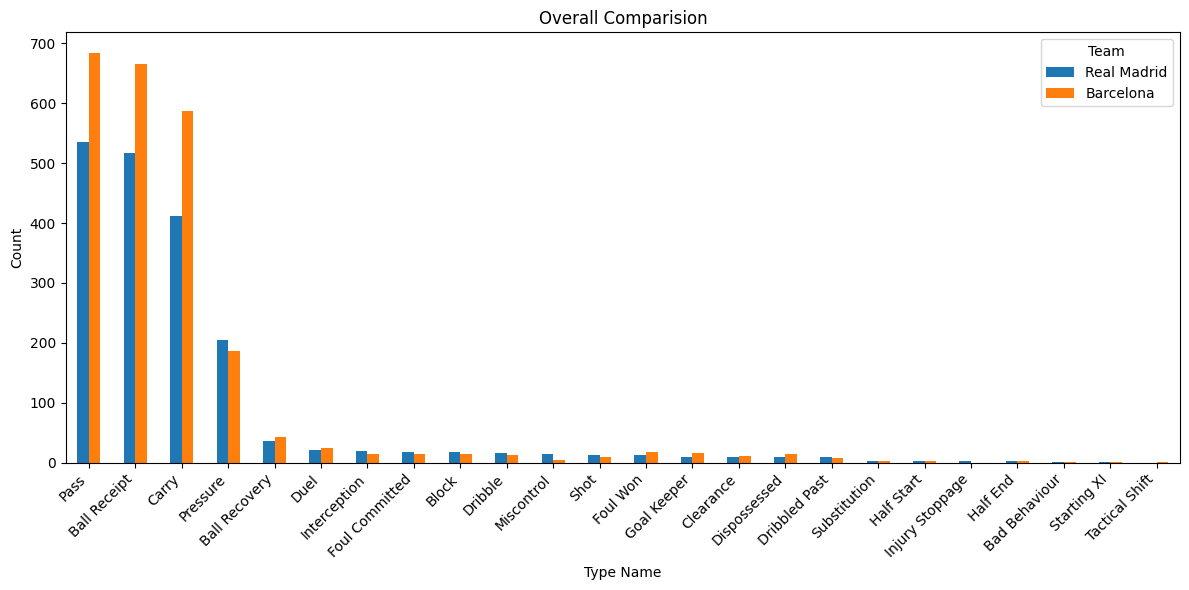

In [24]:
def plot_types(df, home_team, away_team):
    df = df.copy()
    home_team_df = df[df['team_name'] == home_team]
    away_team_df = df[df['team_name'] == away_team]

    home_team_counts = home_team_df['type_name'].value_counts()
    away_team_counts = away_team_df['type_name'].value_counts()

    # Combine counts into a single DataFrame
    combined_counts = pd.concat([home_team_counts, away_team_counts], axis=1, keys=[home_team, away_team])

    # Plot the combined counts side by side
    fig, ax = plt.subplots(figsize=(12, 6))
    combined_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Type Name')
    ax.set_ylabel('Count')
    ax.set_title('Overall Comparision')
    ax.legend(title='Team')

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

plot_types(df, home_team, away_team)
